# 2020/09/26 定期勉強会 データ分析演習

## ライブラリの読み込み
<br>
分析に使用するライブラリを読み込みます。ライブラリを読み込んでおくことで、できることが増えます。

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sp
from sklearn.datasets import load_boston

## データの読み込み
<br>
今回はライブラリのデータを使用します。
<br>
ライブラリを読み込んでいたおかげで、データを簡単に読み込めるようになりました。

In [43]:
data = load_boston()

In [62]:
# データを扱いやすいようにpandasのdata.frameに変換する
df = pd.DataFrame(data.data, columns = data.feature_names).assign(MEDV=np.array(data.target))

### データの軽い確認
<br>
データの頭5行何列か、という構造を軽く確認します。

In [45]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 変数の説明

| カラム | 説明 |
| ---- | ---- |
| CRIM | 町ごとの一人当たりの犯罪率 |
| ZN | 宅地の比率が25,000平方フィートを超える敷地に区画されている。 |
| INDUS |	町当たりの非小売業エーカーの割合 |
| CHAS | チャーリーズ川ダミー変数（川の境界にある場合は1、それ以外の場合は0） |
| NOX | 一酸化窒素濃度（1000万分の1） |
| RM | 1住戸あたりの平均部屋数 |
| AGE | 1940年以前に建設された所有占有ユニットの年齢比率 |
| DIS | 5つのボストンの雇用センターまでの加重距離 |
| RAD | ラジアルハイウェイへのアクセス可能性の指標 |
| TAX |	10,000ドルあたりの税全額固定資産税率 |
| PTRATIO |	生徒教師の比率 |
| B | 町における黒人の割合 |
| LSTAT | 人口当たり地位が低い率 |
| MEDV | 1000ドルでの所有者居住住宅の中央値 |

## 仮説の確認
<br>
仮説：住宅価格(1000$)は、「非小売業エーカーの割合(%)」、「平均部屋数(部屋)」、「税全額固定資産税率(部屋)」、「生徒教師の比率(%)」、「地位が低い人の割合(%)」によって算出される。

## 使用する変数
<br>

| 目的変数（予測したい値） | 説明 |
| ---- | ---- |
| MEDV | 住宅価格 |

<br>

| 説明変数（予測したい値に影響を与える変数） | 説明 |
| ---- | ---- |
| RM | 1住戸あたりの平均部屋数 |
| PTRATIO |	生徒教師の比率 |

## データ収集
<br>
仮説に沿ったデータのみを抽出する。

In [63]:
df = df[['RM', 'PTRATIO', 'MEDV']]

### データの確認
<br>
変数の数とデータ件数の確認。

In [47]:
print('(行数, 列数) = ', df.shape)

(行数, 列数) =  (506, 3)


データの情報を確認する。

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       506 non-null    float64
 1   PTRATIO  506 non-null    float64
 2   MEDV     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


### 欠損値の確認

In [49]:
print('Train columns with null values: {} \n' .format(df.isnull().sum()))

Train columns with null values: RM         0
PTRATIO    0
MEDV       0
dtype: int64 



### データの基礎統計量の確認
<br>

| 項目名 | 説明 |
| ---- | ---- |
| count |	要素の個数 |
| mean |	平均 |
| std |	標準偏差 |
| min |	最小値 |
| 25% |	第一四分位数 |
| 50% |	中央値 |
| 75% |	第三四分位数 |
| max |	最大値 |

In [50]:
df.describe()

,RM,PTRATIO,MEDV
count,506.000000,506.000000,506.000000
mean,6.284634,18.455534,22.532806
std,0.702617,2.164946,9.197104
min,3.561000,12.600000,5.000000
25%,5.885500,17.400000,17.025000
50%,6.208500,19.050000,21.200000
75%,6.623500,20.200000,25.000000
max,8.780000,22.000000,50.000000


相関係数の算出

In [64]:
df_corr = df_corr = df.corr()
display(df_corr)

,RM,PTRATIO,MEDV
RM,1.000000,-0.355501,0.695360
PTRATIO,-0.355501,1.000000,-0.507787
MEDV,0.695360,-0.507787,1.000000


相関係数を見やすく。

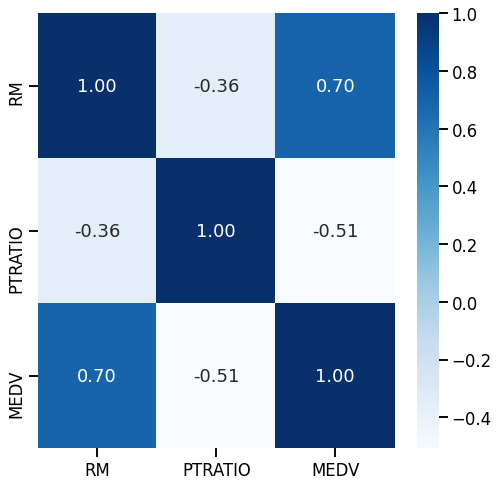

In [52]:
sns.set_context('talk')
fig = plt.subplots(figsize = (8, 8))
 
sns.heatmap(df_corr, annot = True, fmt = '.2f', cmap = 'Blues', square = False)

全体のヒストグラムと散布図の描画。

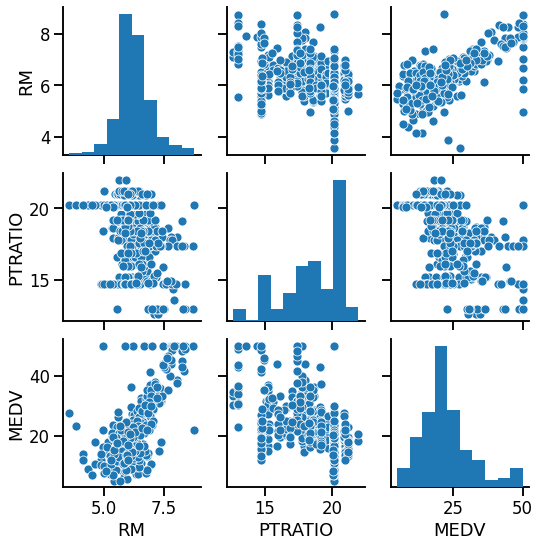

In [53]:
sns.pairplot(df)

### 目的変数のみ確認

ヒストグラム描画

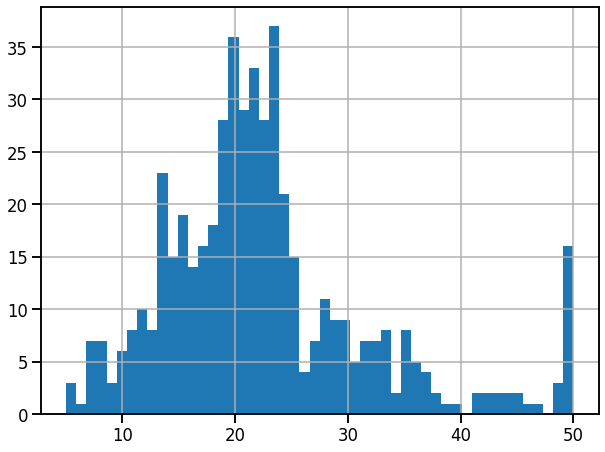

In [65]:
%matplotlib inline
df['MEDV'].hist(bins = 50, figsize = (10, 7.5))
plt.rcParams['figure.figsize'] = [20, 15]

箱ひげ図描画

目的変数が正規分布に従っていないことを確認しておく。

### 説明変数のみ確認

ヒストグラム描画

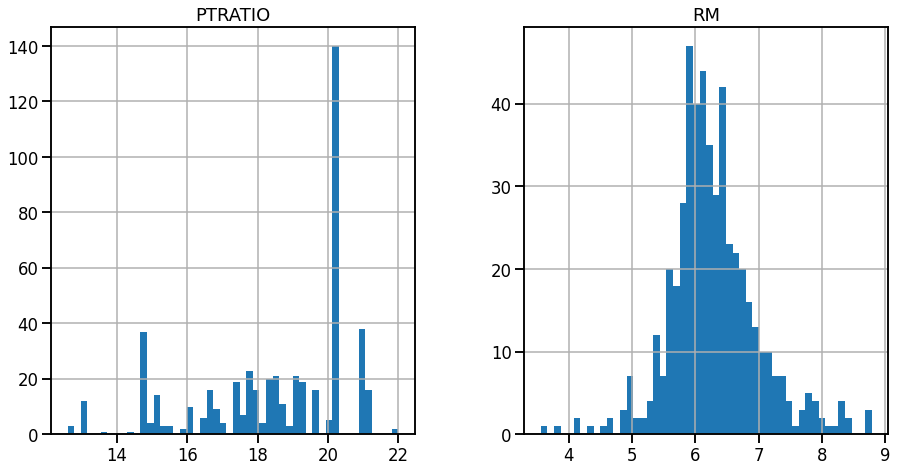

In [67]:
%matplotlib inline
df[['RM', 'PTRATIO']].hist(bins=50, figsize=(15,7.5))
plt.rcParams['figure.figsize'] = [20, 15]

## データ加工

### 外れ値対処

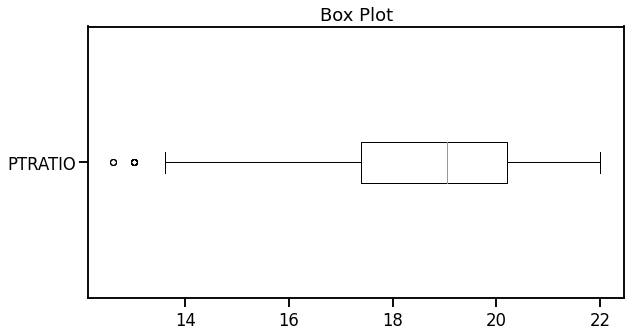

In [68]:
%matplotlib inline
fig_o, ax_o = plt.subplots(figsize=(9.6, 5))
ax_o.set_title('Box Plot')
ax_o.boxplot(df['PTRATIO'], vert = False,  labels=['PTRATIO'])
plt.rcParams['figure.figsize'] = [20, 15]

外れ値の除去。

In [69]:
df.query('PTRATIO >= 13', inplace = True)

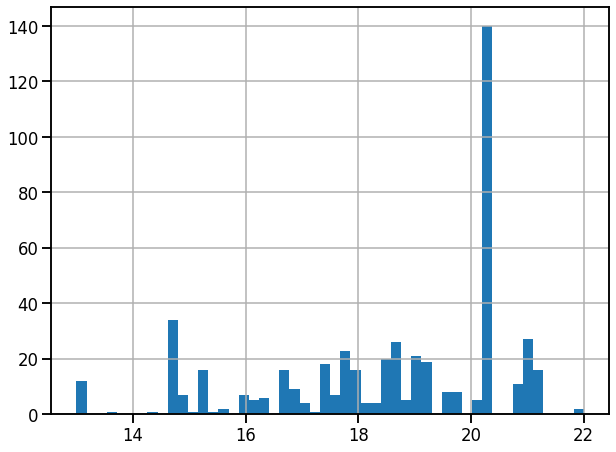

In [70]:
%matplotlib inline
df['PTRATIO'].hist(bins = 50, figsize = (10, 7.5))
plt.rcParams['figure.figsize'] = [20, 15]

In [72]:
df_corr = df_corr = df.corr()
display(df_corr)

,RM,PTRATIO,MEDV
RM,1.000000,-0.343317,0.692728
PTRATIO,-0.343317,1.000000,-0.502841
MEDV,0.692728,-0.502841,1.000000


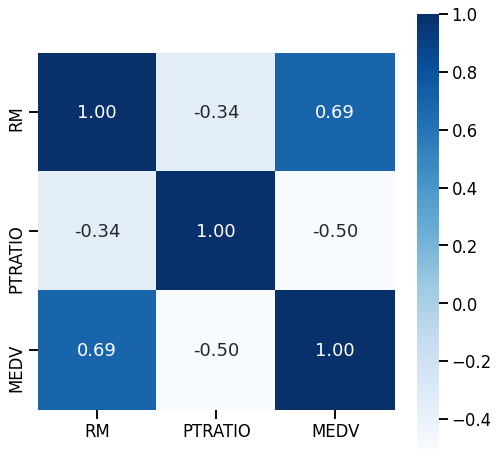

In [74]:
sns.set_context('talk')
fig = plt.subplots(figsize = (8, 8))
 
sns.heatmap(df_corr, annot = True, fmt = '.2f', cmap = 'Blues', square = True)

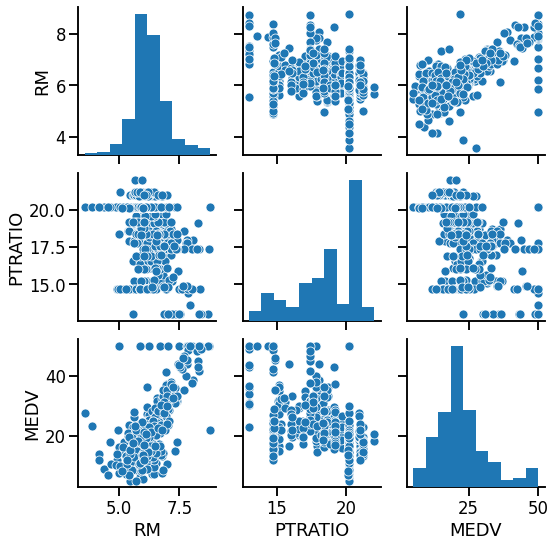

In [76]:
sns.pairplot(df)

## 回帰分析

一旦データを再確認する。

In [77]:
df.head()

,RM,PTRATIO,MEDV
0,6.575,15.3,24.0
1,6.421,17.8,21.6
2,7.185,17.8,34.7
3,6.998,18.7,33.4
4,7.147,18.7,36.2


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 505
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       503 non-null    float64
 1   PTRATIO  503 non-null    float64
 2   MEDV     503 non-null    float64
dtypes: float64(3)
memory usage: 35.7 KB


In [79]:
df.describe()

,RM,PTRATIO,MEDV
count,503.000000,503.000000,503.000000
mean,6.279040,18.490457,22.471968
std,0.700922,2.123411,9.189522
min,3.561000,13.000000,5.000000
25%,5.884500,17.400000,16.900000
50%,6.202000,19.100000,21.200000
75%,6.617000,20.200000,25.000000
max,8.780000,22.000000,50.000000


### モデル構築
<br>
・目的変数：

SalePrice - 住宅価格
<br><br>
・説明変数：

LotArea - 敷地面積

TotRmsAbvGrd - 地上以上の部屋数

ElapYr - 経過年数
<br><br>
#### モデル式
$ {\rm SalePrice} = \beta_0 + {\rm LotArea} \: \times \beta_1 + {\rm TotRmsAbvGrd} \: \times \beta_2 + {\rm ElapYr} \: \times \beta_3 $

In [82]:
x = df[['RM', 'PTRATIO']]
y = df['MEDV']
X = sm.add_constant(x)

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     317.5
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           9.75e-90
Time:                        03:46:34   Log-Likelihood:                -1622.7
No. Observations:                 503   AIC:                             3251.
Df Residuals:                     500   BIC:                             3264.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0235      4.214     -0.480      0.631     -10.302       6.255
RM             7.7298      0.414     18.656      0.000       6.916       8.544
PTRATIO       -1.3002      0.137     -9.506      0.000      -1.569      -1.031
==============================================================================
Omnibus:                      182.880   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1410.609
Skew:                           1.372   Prob(JB):                    4.90e-307
Kurtosis:                      10.732   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 着目する値
<br>
・Adj. R-squared: 自由度調整済み決定係数

・Prob (F-statistic): モデルに対するF検定の有意確率

・coef: 偏回帰係数

・P>|t|: 偏回帰係数に対するt検定の有意確率

・（必要に応じて）AIC: 赤池情報量基準

・（必要に応じて）BIC: ベイズ情報量基準

### 自社データに適応させる

In [ ]:
test_data = pd.read_csv('input/test.csv')
test_data = test_data[['LotArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'YrSold']]
test_data['ElapYr'] = test_data['YrSold'] - test_data['YearRemodAdd']
test_data.drop(['YearRemodAdd', 'YrSold'], axis = 1, inplace = True)
test_data.query('LotArea <= 39000', inplace = True)

In [ ]:
test_data.head()

In [ ]:
pd.DataFrame(result.params)

In [ ]:
test_data['pred_val'] = result.params['const'] + \
    test_data['LotArea'] * result.params['LotArea'] + \
    test_data['TotRmsAbvGrd'] * result.params['TotRmsAbvGrd'] + \
    test_data['ElapYr'] * result.params['ElapYr']

In [ ]:
test_data['pred_val'] = np.exp(test_data['pred_val'])

### 予測された自社保有住宅価格

In [ ]:
pd.DataFrame(test_data['pred_val'])

## 影響度比較

In [ ]:
x = train_data[['LotArea', 'TotRmsAbvGrd', 'ElapYr']]
y = np.log(train_data['SalePrice'])
y.reset_index(inplace=True, drop=True)
x_n = pd.DataFrame(sp.stats.zscore(x, axis=0), \
                   columns=['LotArea', 'TotRmsAbvGrd', 'ElapYr'])
X_n = sm.add_constant(x_n)

model = sm.OLS(y, X_n)
result = model.fit()
result.summary()